In [15]:
from qudit import *
import matplotlib.pyplot as plt
import numpy as np

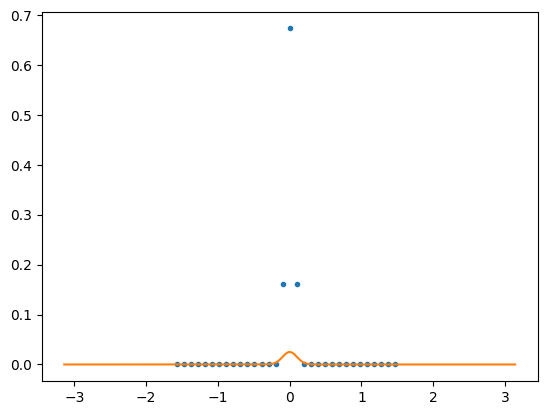

In [31]:
d = 32
q = Qudit(d)
N = 1000

gamma = 1e-2

angles = np.linspace(-np.pi, np.pi, N)
dphi = 2 * np.pi / N
continuous_dephasing = dphi * (2 * np.pi * gamma)**(-0.5) * np.exp(-angles**2 / (2 * gamma))

discrete_angles = np.array(range(-d//2, d//2))
discrete_dephasing = 1/2 * np.array([q.p_dephasing(gamma,i) for i in discrete_angles])

plt.plot(np.pi/d * discrete_angles, discrete_dephasing, '.')
plt.plot(angles, continuous_dephasing, '-')
# plt.yscale('log')

In [19]:
q.p_dephasing(1e-2, 2)

0.003226093289165566

In [25]:
np.pi/d * discrete_angles

array([-1.57079633, -1.47262156, -1.37444679, -1.27627202, -1.17809725,
       -1.07992247, -0.9817477 , -0.88357293, -0.78539816, -0.68722339,
       -0.58904862, -0.49087385, -0.39269908, -0.29452431, -0.19634954,
       -0.09817477,  0.        ,  0.09817477,  0.19634954,  0.29452431,
        0.39269908,  0.49087385,  0.58904862,  0.68722339,  0.78539816,
        0.88357293,  0.9817477 ,  1.07992247,  1.17809725,  1.27627202,
        1.37444679,  1.47262156])

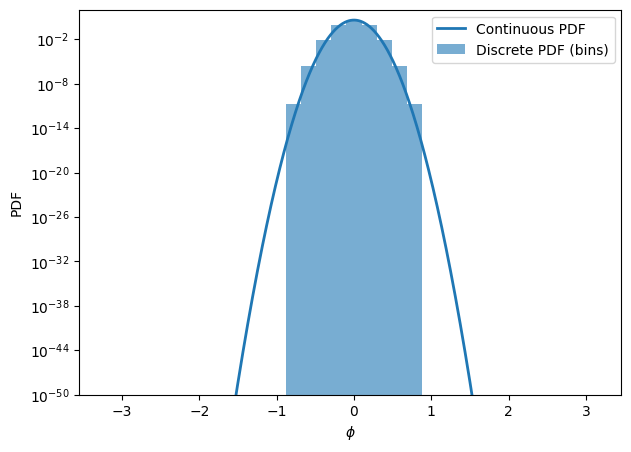

In [48]:
# Parameters
d = 32
gamma = 1e-2
q = Qudit(d)

# 1) Continuous PDF (no factor of dphi in front)
N = 1000
angles = np.linspace(-np.pi, np.pi, N)
continuous_pdf = (
    1 / np.sqrt(2 * np.pi * gamma)
    * np.exp(-angles**2 / (2 * gamma))
)

# 2) Discrete PDF
#    -- p_dephasing(...) gives the *integrated* probability over a bin
#    -- We convert that to a PDF by dividing by the bin width
bin_width = (2*np.pi) / d
discrete_pdf = []
phi_centers = []
phi_edges = []

discrete_inds = np.arange(-d//2, d//2)

for s in discrete_inds:
    # Probability in this bin:
    p_s = q.p_dephasing(gamma, s)
    # The bin is from ((2s-1)*π/d) to ((2s+1)*π/d),
    # so we calculate its edges:
    phi_left = ((2*s - 1)*np.pi/d)
    phi_right = ((2*s + 1)*np.pi/d)
    
    # Convert integrated probability in the bin to a PDF value:
    pdf_s = p_s / bin_width /2
    
    discrete_pdf.append(pdf_s)
    phi_edges.append(phi_left)
phi_edges.append(((2*s + 1)*np.pi/d))  # Add the right edge of the last bin

# Plot both
plt.figure(figsize=(7, 5))
plt.plot(angles, continuous_pdf, label='Continuous PDF', linewidth=2)
plt.bar(
    phi_edges[:-1],  # Left edges of bins
    discrete_pdf,    # Heights
    width=bin_width, # Width of bins
    align='edge',    # Align bar edges with bin edges
    alpha=0.6,       # Slight transparency for visibility
    label='Discrete PDF (bins)'
)
plt.xlabel(r'$\phi$')
plt.ylabel('PDF')
plt.yscale('log')
plt.ylim([1e-50,100])
plt.legend()




In [49]:
# Parameters
d = 32
gamma = np.float128(1e-2)  # Use np.float128 for higher precision
q = Qudit(d)

# 1) Continuous PDF
N = 1000
angles = np.linspace(-np.pi, np.pi, N, dtype=np.float128)  # High precision angles
continuous_pdf = (
    1 / np.sqrt(2 * np.pi * gamma, dtype=np.float128)
    * np.exp(-angles**2 / (2 * gamma), dtype=np.float128)
)

# 2) Discrete PDF
bin_width = np.float128(2 * np.pi / d)  # High precision bin width
discrete_pdf = []
phi_edges = []
discrete_inds = np.arange(-d//2, d//2, dtype=np.int64)

for s in discrete_inds:
    # Call the class method with high-precision gamma
    p_s = q.p_dephasing(float(gamma), s)  # Pass gamma as float for compatibility
    # Convert the result to np.float128
    p_s = np.float128(p_s)
    
    # Calculate bin edges
    phi_left = np.float128((2*s - 1)*np.pi/d)
    phi_right = np.float128((2*s + 1)*np.pi/d)
    
    # Convert integrated probability in the bin to a PDF value
    pdf_s = p_s / bin_width
    
    discrete_pdf.append(pdf_s)
    phi_edges.append(phi_left)
phi_edges.append(((2*s + 1)*np.pi/d))  # Add the right edge of the last bin

# Plot both
plt.figure(figsize=(7, 5))
plt.plot(angles, continuous_pdf, label='Continuous PDF', linewidth=2)
plt.bar(
    phi_edges[:-1],  # Left edges of bins
    discrete_pdf,    # Heights
    width=bin_width, # Width of bins
    align='edge',    # Align bar edges with bin edges
    alpha=0.6,       # Slight transparency for visibility
    label='Discrete PDF (bins)'
)
plt.xlabel(r'$\phi$')
plt.ylabel('PDF')
plt.yscale('log')  # Use a logarithmic scale to emphasize small values
plt.legend()
plt.show()

AttributeError: module 'numpy' has no attribute 'float128'

In [51]:
from decimal import Decimal, getcontext
import numpy as np
import matplotlib.pyplot as plt

# Increase precision
getcontext().prec = 50

# Example Qudit class with higher precision
class Qudit:
    def __init__(self, d):
        self.d = d
        
    def p_dephasing(self, gamma_dephasing, s):
        """
        Returns the integrated probability for a 'dephasing rotation' 
        in the bin from ((2s - 1)*π/d) to ((2s + 1)*π/d) with high precision.
        """
        if s > (self.d / 2):
            s = s - self.d
        
        # Convert inputs to Decimal for higher precision
        gamma_dephasing = Decimal(gamma_dephasing)
        s = Decimal(s)
        d = Decimal(self.d)
        
        # Calculate boundaries
        x_left = Decimal(1).sqrt() / Decimal(2 * gamma_dephasing).sqrt() * (2*s - 1) * Decimal(np.pi) / d
        x_right = Decimal(1).sqrt() / Decimal(2 * gamma_dephasing).sqrt() * (2*s + 1) * Decimal(np.pi) / d
        
        # Use erf from Decimal (limited to small ranges, adjust precision if needed)
        return float(Decimal.erf(x_right) - Decimal.erf(x_left))

# Parameters
d = 32
gamma = 1e-2
q = Qudit(d)

# 1) Continuous PDF (no factor of dphi in front)
N = 1000
angles = np.linspace(-np.pi, np.pi, N)
continuous_pdf = (
    1 / np.sqrt(2 * np.pi * gamma)
    * np.exp(-angles**2 / (2 * gamma))
)

# 2) Discrete PDF
bin_width = (2*np.pi) / d
discrete_pdf = []
phi_edges = []
discrete_inds = np.arange(-d//2, d//2)

for s in discrete_inds:
    # Probability in this bin:
    p_s = q.p_dephasing(gamma, s)
    # The bin is from ((2s-1)*π/d) to ((2s+1)*π/d),
    # so we calculate its edges:
    phi_left = ((2*s - 1)*np.pi/d)
    phi_right = ((2*s + 1)*np.pi/d)
    
    # Convert integrated probability in the bin to a PDF value:
    pdf_s = p_s / bin_width
    
    discrete_pdf.append(pdf_s)
    phi_edges.append(phi_left)
phi_edges.append(((2*s + 1)*np.pi/d))  # Add the right edge of the last bin

# Plot both
plt.figure(figsize=(7, 5))
plt.plot(angles, continuous_pdf, label='Continuous PDF', linewidth=2)
plt.bar(
    phi_edges[:-1],  # Left edges of bins
    discrete_pdf,    # Heights
    width=bin_width, # Width of bins
    align='edge',    # Align bar edges with bin edges
    alpha=0.6,       # Slight transparency for visibility
    label='Discrete PDF (bins)'
)
plt.xlabel(r'$\phi$')
plt.ylabel('PDF')
plt.yscale('log')  # Use a logarithmic scale to emphasize small values
plt.legend()
plt.show()


TypeError: conversion from numpy.int32 to Decimal is not supported

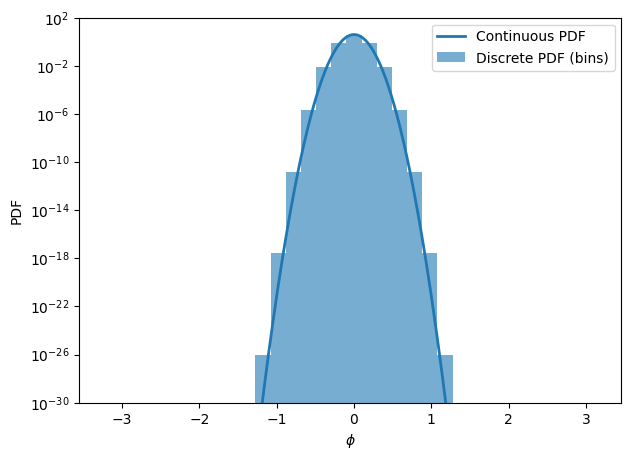

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

import mpmath
mpmath.mp.prec = 1000  # Increase precision to ~30 decimal digits, for example

def p_dephasing_mpmath(gamma, s, d):
    if s > (d / 2):
        s -= d
    x_left  = mpmath.sqrt(1/(2*gamma)) * (2*s - 1)*mpmath.pi / d
    x_right = mpmath.sqrt(1/(2*gamma)) * (2*s + 1)*mpmath.pi / d
    return mpmath.erf(x_right) - mpmath.erf(x_left)


# Parameters
d = 32
gamma = 1e-2
q = Qudit(d)

# 1) Continuous PDF (no factor of dphi in front)
N = 1000
angles = np.linspace(-np.pi, np.pi, N)
continuous_pdf = (
    1 / np.sqrt(2 * np.pi * gamma)
    * np.exp(-angles**2 / (2 * gamma))
)

# 2) Discrete PDF
bin_width = (2*np.pi) / d
discrete_pdf = []
phi_edges = []
discrete_inds = np.arange(-d//2, d//2)

for s in discrete_inds:
    # Probability in this bin:
    p_s = p_dephasing_mpmath(gamma, s, d)
    # The bin is from ((2s-1)*π/d) to ((2s+1)*π/d),
    # so we calculate its edges:
    phi_left = ((2*s - 1)*np.pi/d)
    phi_right = ((2*s + 1)*np.pi/d)
    
    # Convert integrated probability in the bin to a PDF value:
    pdf_s = p_s / bin_width /2
    
    discrete_pdf.append(pdf_s)
    phi_edges.append(phi_left)
phi_edges.append(((2*s + 1)*np.pi/d))  # Add the right edge of the last bin

# Plot both
plt.figure(figsize=(7, 5))
plt.plot(angles, continuous_pdf, label='Continuous PDF', linewidth=2)
plt.bar(
    phi_edges[:-1],  # Left edges of bins
    discrete_pdf,    # Heights
    width=bin_width, # Width of bins
    align='edge',    # Align bar edges with bin edges
    alpha=0.6,       # Slight transparency for visibility
    label='Discrete PDF (bins)'
)
plt.xlabel(r'$\phi$')
plt.ylabel('PDF')
plt.legend()
plt.yscale('log')
plt.ylim([1e-30,100])
plt.show()


In [60]:
s=6
gamma_dephasing=1e-2
erf((np.sqrt(1/(2*gamma_dephasing)) * (2*s + 1)*np.pi / d).astype(np.float64))

1.0